In [1]:
import itertools, math
import numpy as np
from scipy.stats import distributions
import matplotlib.pyplot as plt
from classes.dpm import BaseMeasure, DPM, NormalBaseMeasure
from classes.likelihood import NormalLikelihood
from classes.variables import Normal, InvGamma

In [2]:
mu1 = -3
mu2 = 3
w1 = .7
xmin = -3
xmax = 3

N_total = 100

y = np.concatenate([distributions.norm.rvs(loc=mu1, scale=1, size=int(w1*N_total)), distributions.norm.rvs(loc=mu2, scale=1, size=int((1-w1)*N_total))])
# y = np.array([-1.00665889, 0.06582354, -0.42930577, -1.79629266, -2.36489645, -0.95595253, -2.9021129, -3.91924953, -1.97221089, -3.35683184, 2.71581309, 1.47543713, 2.96155554, 2.42930198, 2.14831234, 2.29008695, 3.17209821, 2.03396742, 2.26676773, 2.66977811,])
s = [0, 1, 2, 3] * int((N_total / 4))
xmin = np.min(y) - 1
xmax = np.max(y) + 1
xrange = np.arange(xmin,xmax,0.01)


mu1_actual = np.mean(y[:70])
mu2_actual = np.mean(y[70:])
std1_actual = np.std(y[:70])
std2_actual = np.std(y[70:])

def f(X, w1=w1) -> np.ndarray:
    return w1*distributions.norm.pdf(X, loc=mu1, scale=1) + (1-w1)*distributions.norm.pdf(X, loc=mu2, scale=1)

def f_data(X, w1=w1) -> np.ndarray:
    return w1*distributions.norm.pdf(X, loc=mu1_actual, scale=std1_actual) + (1-w1)*distributions.norm.pdf(X, loc=mu2_actual, scale=std2_actual)

def f2(X, y=y) -> np.ndarray:
    return distributions.norm.pdf(X, loc=np.mean(y), scale=np.std(y))


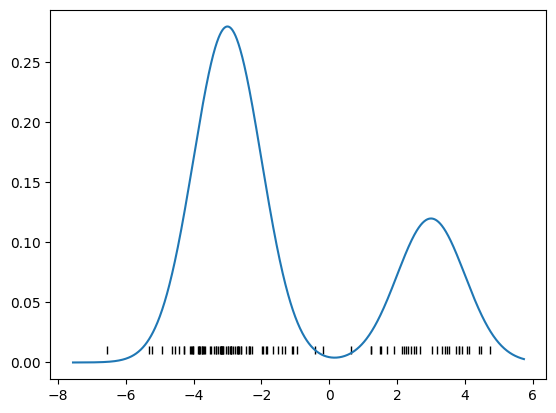

In [3]:
plt.plot(y, [0.01]*len(y), '|', color="k")
plt.plot(xrange, f(xrange))

In [4]:
measures = [
    [-5, 1],
    [-2, 1],
    [2, 1],
    [5, 1]]

base_measure = NormalBaseMeasure([Normal(mu=0,sigma=3), InvGamma()])
dpm = DPM(base_measure, M=0.5)

dpm.set_dataset(y, s)

dpm.set_measures(measures)
dpm.set_weights()

dpm.sample(400)


step:   80/  80 : [1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 0, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2]
step:  160/ 160 : [2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1]
step:  240/ 240 : [0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1]
step:  320/ 320 : [0, 0, 0, 0, 0, 0, 0, 0, 

In [5]:
def plot_posterior_density(x, results:dict, xmin=xmin, xmax=xmax):
    w = results["w"][:]
    t = results["theta"][:]

    big_X = np.arange(np.min(x)-2, np.max(x)+2, 0.01)

    fig, ax = plt.subplots(1,2, figsize=(12, 6))

    a, b = np.unique(results["n_clusters"], return_counts=True)
    ax[0].bar(x=a, height=b)


    for i in range(len(w)):
        len_w = len(w[i])

        y = []
        mu = np.array(t[i])[:,0]
        sigma = np.array(t[i])[:,1]

        for j in range(len_w):
            y.append(w[i][j] * distributions.norm.pdf(big_X, loc=mu[j], scale=sigma[j]))

            
        y = np.sum(y, axis=0)

        ax[1].plot(big_X, y, color="k", alpha=0.02)

    ax[1].plot(x, [0.01]*len(x), '|', color="k")
    ax[1].plot(np.arange(xmin, xmax, 0.01), f_data(np.arange(xmin, xmax, 0.01)), color="tab:blue")
    ax[1].plot(np.arange(xmin, xmax, 0.01), f(np.arange(xmin, xmax, 0.01)), linestyle="dashed")
    ax[1].plot(np.arange(xmin, xmax, 0.01), f2(np.arange(xmin, xmax, 0.01)), color="red", linestyle="dashed")


In [6]:
chain = dpm._dpm_chain
results = {"w": chain.w, "theta": chain.phi, "n_clusters": chain.n}

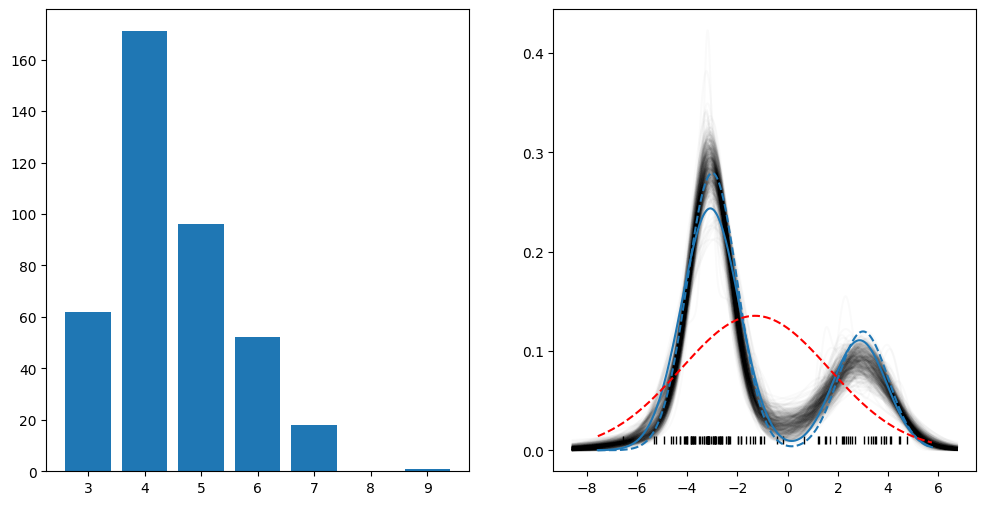

In [7]:
plot_posterior_density(y, results)